#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

W1103 21:43:25.220767 4611605952 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W1103 21:43:25.265893 4611605952 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1103 21:43:25.269692 4611605952 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.add(Dropout(rate=0.25))

W1103 21:43:25.294198 4611605952 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1103 21:43:25.305389 4611605952 deprecation.py:506] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W1103 21:43:25.676250 4611605952 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [34]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history_one=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 56s 1ms/step - loss: 0.1990 - acc: 0.9213 - val_loss: 0.2088 - val_acc: 0.9164
Epoch 2/12
37500/37500 [==============================] - 64s 2ms/step - loss: 0.1985 - acc: 0.9218 - val_loss: 0.2081 - val_acc: 0.9166
Epoch 3/12
37500/37500 [==============================] - 56s 2ms/step - loss: 0.1974 - acc: 0.9228 - val_loss: 0.2073 - val_acc: 0.9173
Epoch 4/12
37500/37500 [==============================] - 55s 1ms/step - loss: 0.1978 - acc: 0.9220 - val_loss: 0.2070 - val_acc: 0.9172
Epoch 5/12
37500/37500 [==============================] - 56s 1ms/step - loss: 0.1972 - acc: 0.9222 - val_loss: 0.2069 - val_acc: 0.9176
Epoch 6/12
37500/37500 [==============================] - 57s 2ms/step - loss: 0.1967 - acc: 0.9225 - val_loss: 0.2064 - val_acc: 0.9176
Epoch 7/12
37500/37500 [==============================] - 57s 2ms/step - loss: 0.1960 - acc: 0.9227 - val_loss: 0.2057 - val_acc

In [24]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history_two=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    



Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 62s 2ms/step - loss: 0.0814 - acc: 0.3022 - val_loss: 0.0825 - val_acc: 0.3270
Epoch 2/12
37500/37500 [==============================] - 62s 2ms/step - loss: 0.0812 - acc: 0.3068 - val_loss: 0.0824 - val_acc: 0.3289
Epoch 3/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0811 - acc: 0.3092 - val_loss: 0.0822 - val_acc: 0.3306
Epoch 4/12
37500/37500 [==============================] - 64s 2ms/step - loss: 0.0809 - acc: 0.3125 - val_loss: 0.0822 - val_acc: 0.3321
Epoch 5/12
37500/37500 [==============================] - 63s 2ms/step - loss: 0.0807 - acc: 0.3150 - val_loss: 0.0820 - val_acc: 0.3354
Epoch 6/12
37500/37500 [==============================] - 68s 2ms/step - loss: 0.0807 - acc: 0.3119 - val_loss: 0.0819 - val_acc: 0.3350
Epoch 7/12
37500/37500 [==============================] - 64s 2ms/step - loss: 0.0806 - acc: 0.3163 - val_loss: 0.0818 - val_acc

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history_one.history[train_acc])
    plt.plot(train_history_one.history[test_acc])
    plt.title('Train History_binary_crossentropy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc_one', 'val_acc_one'], loc='upper left')
    plt.show()

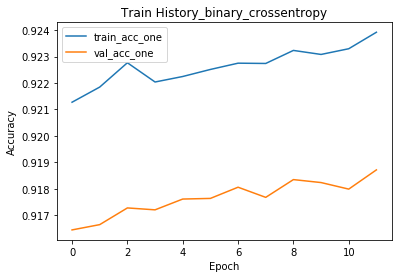

In [37]:
show_train_history('acc','val_acc')

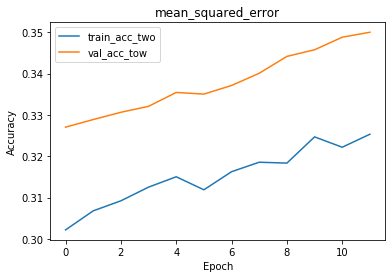

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history_two.history[train_acc])
    plt.plot(train_history_two.history[test_acc])
    plt.title('mean_squared_error')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc_two', 'val_acc_tow'], loc='upper left')
    plt.show()
    
show_train_history('acc','val_acc')

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history_three=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 58s 2ms/step - loss: 1.8700 - acc: 0.3397 - val_loss: 1.8587 - val_acc: 0.3802
Epoch 2/12
37500/37500 [==============================] - 59s 2ms/step - loss: 1.7505 - acc: 0.3782 - val_loss: 1.7635 - val_acc: 0.4050
Epoch 3/12
37500/37500 [==============================] - 58s 2ms/step - loss: 1.6655 - acc: 0.4052 - val_loss: 1.6934 - val_acc: 0.4399
Epoch 4/12
37500/37500 [==============================] - 61s 2ms/step - loss: 1.6017 - acc: 0.4274 - val_loss: 1.6460 - val_acc: 0.4482
Epoch 5/12
37500/37500 [==============================] - 62s 2ms/step - loss: 1.5411 - acc: 0.4499 - val_loss: 1.5857 - val_acc: 0.4698
Epoch 6/12
37500/37500 [==============================] - 63s 2ms/step - loss: 1.5010 - acc: 0.4632 - val_loss: 1.5463 - val_acc: 0.4915
Epoch 7/12
37500/37500 [==============================] - 61s 2ms/step - loss: 1.4528 - acc: 0.4809 - val_loss: 1.4899 - val_acc

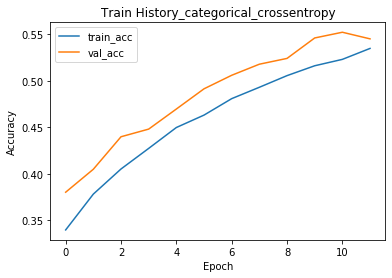

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history_three.history[train_acc])
    plt.plot(train_history_three.history[test_acc])
    plt.title('Train History_categorical_crossentropy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('acc','val_acc')